In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
models = ["rf", "mpl", "rfmpl", "borfmlp"]
colors = {
    "rf": {"face": "#1f77b4", "edge": "#0d3d66"},
    "mlp": {"face": "#ff7f0e", "edge": "#b35400"},
    "rfmlp": {"face": "#d62728", "edge": "#7f1a1a"},
    "borfmlp": {"face": "#2ca02c", "edge": "#145214"},
}

In [3]:
metrics = pd.read_csv("../dataset/predictions/metrics.csv")
metrics

,Model,Target,MAE,RMSE,R²,MBE
0,borfmlp_fChl,fChl,1.46,1.93,82.58,-0.17
1,rfmlp_fChl,fChl,1.46,1.94,82.56,-0.23
2,rf_fChl,fChl,1.60,2.09,79.61,0.01
3,mlp_fChl,fChl,1.70,2.41,73.05,0.11
4,borfmlp_Turbidity,Turbidity,5.34,7.38,95.61,-0.79
5,rfmlp_Turbidity,Turbidity,5.90,8.11,94.70,-0.87
6,mlp_Turbidity,Turbidity,6.61,9.25,93.09,0.29
7,rf_Turbidity,Turbidity,9.07,12.69,86.99,0.33
8,borfmlp_DO,DO,0.44,0.60,91.41,-0.01
9,rfmlp_DO,DO,0.45,0.61,90.94,0.00


In [4]:
predicts = {
    "Turbidity": pd.read_csv("../dataset/predictions/Turbidity.csv"),
    "DO": pd.read_csv("../dataset/predictions/DO.csv"),
    "fChl": pd.read_csv("../dataset/predictions/fChl.csv"),
}

In [5]:
predicts["Turbidity"].head()

,Turbidity,rf_Turbidity,mlp_Turbidity,borfmlp_Turbidity,rfmlp_Turbidity
0,68.1,71.724,64.458946,66.357403,63.441934
1,43.6,31.436,30.929830,34.996351,31.822760
2,152.0,139.232,147.034587,136.946158,135.914627
3,153.0,105.377,147.662699,137.835245,140.011691
4,22.2,34.359,20.806969,23.506382,24.047535


In [6]:
predicts["DO"].head()

,DO,rf_DO,mlp_DO,borfmlp_DO,rfmlp_DO
0,10.2,10.347,11.652401,10.459597,10.382837
1,10.6,10.104,10.439160,9.834492,9.981621
2,8.6,9.774,7.063467,9.425116,9.500806
3,7.8,9.289,8.349853,8.865154,9.310897
4,13.1,13.105,11.673926,12.922708,12.965227


In [7]:
predicts["fChl"].head()

,fChl,rf_fChl,mlp_fChl,borfmlp_fChl,rfmlp_fChl
0,2.8,3.584,4.746184,3.826191,3.786033
1,6.0,10.480,9.753507,8.598258,8.239133
2,3.2,3.339,2.967564,2.975148,3.354063
3,1.6,3.058,3.320998,2.623374,2.752108
4,2.1,2.171,1.218013,2.192735,2.595071


In [16]:
def scat(axes, i, col, model):
    x = predicts[col][col]
    y = predicts[col][model + "_" + col]
    axes[i].scatter(
        x, y,
        s=60,
        c=colors[model]["face"], edgecolors= colors[model]["edge"],
        alpha=0.6)

In [17]:
def comparison(col):
    fig, axes = plt.subplots(2, 4, figsize=(30, 12))
    axes = axes.flatten()

    scat(axes, 0, col, "rf")
    scat(axes, 1, col, "mlp")
    scat(axes, 4, col, "rfmlp")
    scat(axes, 5, col, "borfmlp")

    plt.tight_layout()
    plt.show()

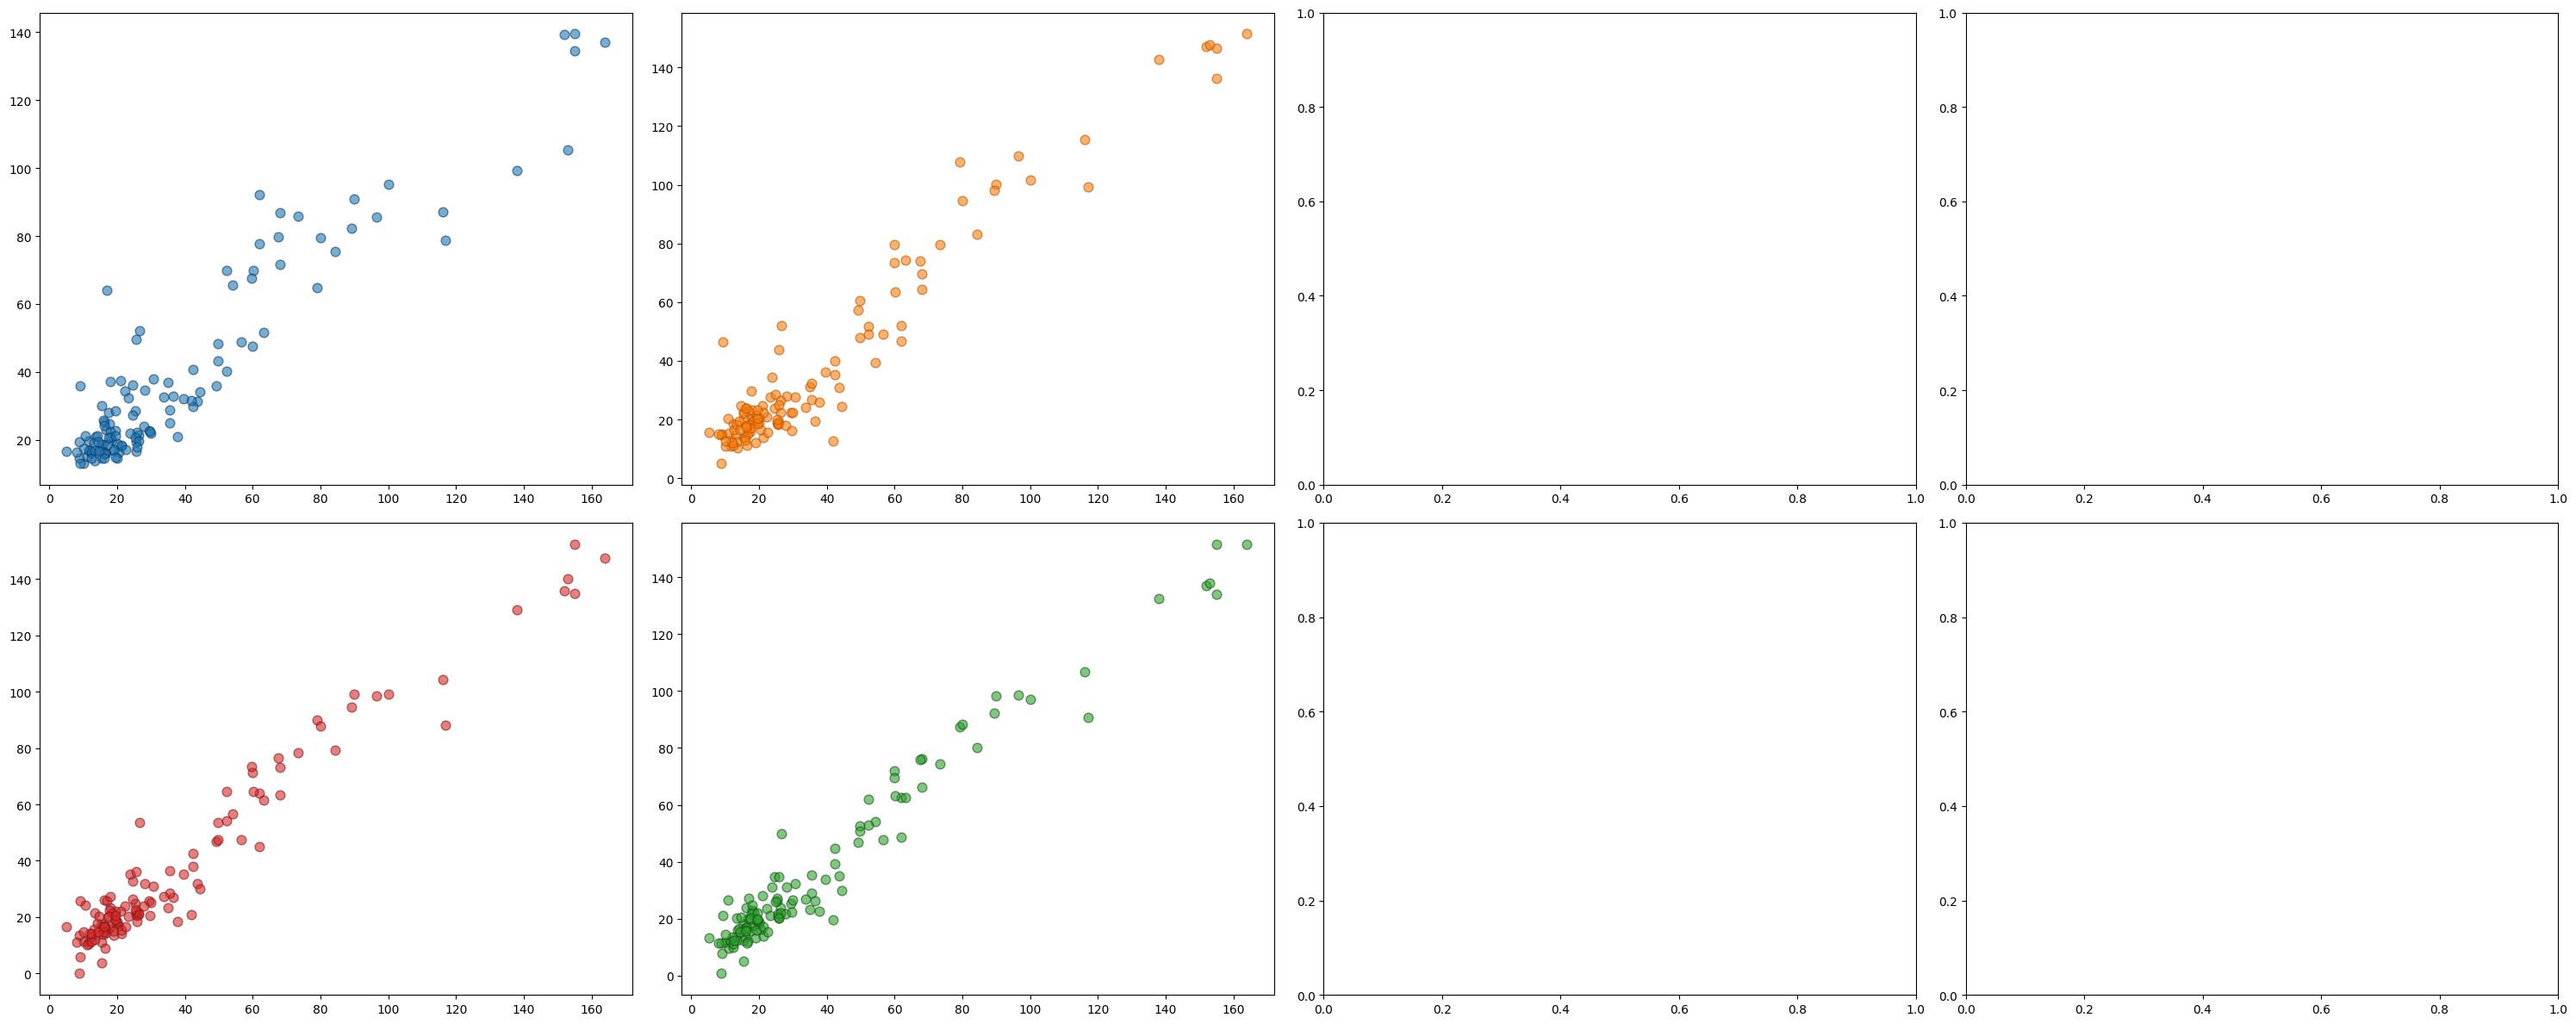

In [18]:
comparison("Turbidity")